In [2]:
import pandas as pd
import numpy as np

In [8]:
elo = pd.read_csv('Elo_ratings_with_Champs.csv')
elo

,season,team,Pre-Season,Post-Reg_Season,Mean,Median,Min,Max,winner
0,1947,TRH,1300.000000,1208.313400,1242.179863,1236.873300,1200.070300,1236.873300,PHW
1,1947,NYK,1300.000000,1332.156000,1308.528252,1305.857150,1249.861200,1305.857150,PHW
2,1947,PRO,1300.000000,1276.740600,1279.100227,1275.776350,1250.736000,1275.776350,PHW
3,1947,STB,1300.000000,1369.411400,1344.680377,1348.777500,1302.598800,1348.777500,PHW
4,1947,CHS,1300.000000,1386.625600,1359.185192,1353.045800,1299.062600,1353.045800,PHW
...,...,...,...,...,...,...,...,...,...
1692,2022,WAS,1494.785854,1418.436496,1459.241778,1463.664629,1372.329766,1463.664629,GSW
1693,2022,ATL,1570.150094,1563.918805,1530.689816,1530.939576,1448.855121,1530.939576,GSW
1694,2022,LAC,1624.110628,1537.785097,1521.520605,1508.691391,1450.954385,1508.691391,GSW
1695,2022,DAL,1540.788162,1598.770266,1565.299401,1576.509342,1495.587067,1576.509342,GSW


In [10]:
salary_caps

,Season,Salary Cap,Adjusted
0,1985,3600000,9793069.0
1,1986,4233000,11298280.0
2,1987,4945000,12734751.0
3,1988,6164000,15248702.0
4,1989,7232000,17069461.0
5,1990,9802000,21950887.0
6,1991,11871000,25499592.0
7,1992,12500000,26061180.0
8,1993,14000000,28354756.0
9,1994,15175000,29954782.0


In [12]:
sal_df = pd.read_csv('cleaned_normalized_salaries.csv')

In [26]:
sal_df

,season,team,lg,salary,player_id,normalized salary,salary_cap,2022 salary
0,1991,POR,NBA,395000,abdelal01,0.033274,11871000,25499592.0
1,1992,POR,NBA,494000,abdelal01,0.039520,12500000,26061180.0
2,1993,BOS,NBA,500000,abdelal01,0.035714,14000000,28354756.0
3,1994,BOS,NBA,805000,abdelal01,0.053048,15175000,29954782.0
4,1995,SAC,NBA,650000,abdelal01,0.040717,15964000,30651995.0
...,...,...,...,...,...,...,...,...
16940,2018,LAL,NBA,1312611,zubaciv01,0.013246,99093000,115455294.0
16941,2019,LAC,NBA,1544951,zubaciv01,0.015166,101869000,116573245.0
16942,2020,LAC,NBA,6481482,zubaciv01,0.059387,109140000,123384194.0
16943,2021,LAC,NBA,7000000,zubaciv01,0.064138,109140000,117838496.0


In [35]:
tot_salaries = sal_df[sal_df.columns[:-2]].groupby(by=['season', 'team']).sum()
tot_salaries

salary  normalized salary
season team                              
1985   ATL     2874000           0.798333
       BKN     3992000           1.108889
       BOS     6134000           1.703889
       CHI     3974000           1.103889
       CLE     2880000           0.800000
...                ...                ...
2022   SAC   129677197           1.153568
       SAS   126163542           1.122312
       TOR   133867382           1.190843
       UTA   148193388           1.318282
       WAS   127041356           1.130120

[1071 rows x 2 columns]

In [51]:
df = tot_salaries.drop(columns = 'salary').reset_index().pivot(
        index = ['season'], 
        columns = "team",
        values = "normalized salary"
    ).reset_index()

<AxesSubplot:>

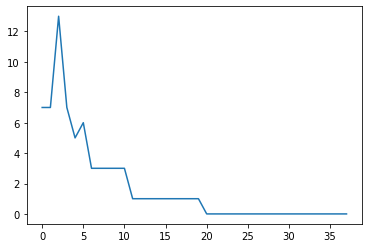

In [56]:
df.isnull().sum(axis=1).plot()

In [55]:
df.isna().sum(axis =1)

0      7
1      7
2     13
3      7
4      5
5      6
6      3
7      3
8      3
9      3
10     3
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
dtype: int64